# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

response = requests.get(url)
print(response.status_code)

if response.status_code == 403:
    headers = {'User-Agent':"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url,headers=headers)
    time.sleep(5)
    html_data = request.text
    print(request.status_code)
html_data

403
200


'\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\r\n\t\t<link rel="alternate" media="only screen and (max-width: 768px)" href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue">\r\n\t\t<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>\r\n\t\t<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png">\r\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of mo

In [4]:
soup = BeautifulSoup(html_data,'html.parser')
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<link href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue" media="only screen and (max-width: 768px)" rel="alternate"/>
<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Reve

In [5]:
todas_las_tablas = soup.find_all('table')
todas_las_tablas

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [7]:
for index,table in enumerate(todas_las_tablas):
    if('2023-06-30' in str(table)):
        indice_tabla = index
        break
indice_tabla

1

In [8]:
todas_las_tablas[indice_tabla]


<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2024-09-30</td>
<td style="text-align:center">$25,182</td>
</tr>
<tr>
<td style="text-align:center">2024-06-30</td>
<td style="text-align:center">$25,500</td>
</tr>
<tr>
<td style="text-align:center">2024-03-31</td>
<td style="text-align:center">$21,301</td>
</tr>
<tr>
<td style="text-align:center">2023-12-31</td>
<td style="text-align:center">$25,167</td>
</tr>
<tr>
<td style="text-align:center">2023-09-30</td>
<td style="text-align:center">$23,350</td>
</tr>
<tr>
<td style="text-align:center">2023-06-30</td>
<td style="text-align:center">$24,927</td>
</tr>
<tr>
<td style="text-align:center">2023-03-31</td>
<td style="text-align:center">$23,329</td>
</tr>
<tr>
<td style="text-align:center">2022-12-31</td>
<td style="text-align:center">$24,318<

In [16]:
import pandas as pd
df_tesla = pd.DataFrame(columns=['Fecha','Revenue'])

#iterar por la tabla para extraer los valores

for row in todas_las_tablas[indice_tabla].tbody.find_all('tr'):
    col = row.find_all('td')
    if col != []:
        Fecha = col[0].text
        Revenue = col[1].text.replace('$','').replace(' ','').replace(',','')
        df_tesla = pd.concat([df_tesla,pd.DataFrame({'Fecha':Fecha,'Revenue':Revenue},index=[0])],ignore_index=True)
df_tesla

,Fecha,Revenue
0,2024-09-30,25182
1,2024-06-30,25500
2,2024-03-31,21301
3,2023-12-31,25167
4,2023-09-30,23350
...,...,...
57,2010-06-30,28
58,2010-03-31,21
59,2009-12-31,
60,2009-09-30,46


In [17]:
df_tesla.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Fecha    62 non-null     object
 1   Revenue  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [18]:
df_tesla['Revenue'] = pd.to_numeric(df_tesla['Revenue'])

In [19]:
df_tesla.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    62 non-null     object 
 1   Revenue  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [20]:
df_tesla

,Fecha,Revenue
0,2024-09-30,25182.0
1,2024-06-30,25500.0
2,2024-03-31,21301.0
3,2023-12-31,25167.0
4,2023-09-30,23350.0
...,...,...
57,2010-06-30,28.0
58,2010-03-31,21.0
59,2009-12-31,NaN
60,2009-09-30,46.0


In [21]:
df_tesla.dropna(inplace=True)
df_tesla.info()

df_tesla.to_csv('../assets/tesla.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 61
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    61 non-null     object 
 1   Revenue  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [22]:
conexion = sqlite3.connect('Tesla.db')
cursor = conexion.cursor()

cursor.execute("""
               CREATE TABLE IF NOT EXISTS revenue_tesla_trimestral (Fecha,Revenue)
               """)

In [23]:
tuplas = list(df_tesla.to_records(index=False))
tuplas

[np.record(('2024-09-30', 25182.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2024-06-30', 25500.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2024-03-31', 21301.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-12-31', 25167.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-09-30', 23350.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-06-30', 24927.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-03-31', 23329.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2022-12-31', 24318.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2022-09-30', 21454.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2022-06-30', 16934.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2022-03-31', 18756.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2021-12-31', 17719.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2021-09-30', 13

In [24]:
cursor.executemany('INSERT INTO revenue_tesla_trimestral VALUES (?,?)',tuplas)
conexion.commit()

In [25]:
resultado = cursor.execute("""
                            SELECT * FROM revenue_tesla_trimestral
                           """)
for row in resultado:
    print(row)

('2024-09-30', 25182.0)
('2024-06-30', 25500.0)
('2024-03-31', 21301.0)
('2023-12-31', 25167.0)
('2023-09-30', 23350.0)
('2023-06-30', 24927.0)
('2023-03-31', 23329.0)
('2022-12-31', 24318.0)
('2022-09-30', 21454.0)
('2022-06-30', 16934.0)
('2022-03-31', 18756.0)
('2021-12-31', 17719.0)
('2021-09-30', 13757.0)
('2021-06-30', 11958.0)
('2021-03-31', 10389.0)
('2020-12-31', 10744.0)
('2020-09-30', 8771.0)
('2020-06-30', 6036.0)
('2020-03-31', 5985.0)
('2019-12-31', 7384.0)
('2019-09-30', 6303.0)
('2019-06-30', 6350.0)
('2019-03-31', 4541.0)
('2018-12-31', 7226.0)
('2018-09-30', 6824.0)
('2018-06-30', 4002.0)
('2018-03-31', 3409.0)
('2017-12-31', 3288.0)
('2017-09-30', 2985.0)
('2017-06-30', 2790.0)
('2017-03-31', 2696.0)
('2016-12-31', 2285.0)
('2016-09-30', 2298.0)
('2016-06-30', 1270.0)
('2016-03-31', 1147.0)
('2015-12-31', 1214.0)
('2015-09-30', 937.0)
('2015-06-30', 955.0)
('2015-03-31', 940.0)
('2014-12-31', 957.0)
('2014-09-30', 852.0)
('2014-06-30', 769.0)
('2014-03-31', 621.0)
('

In [26]:
df_tesla.to_sql('revenue2',con=conexion,index = False)

61

In [27]:
resultado = cursor.execute("""
                            SELECT * FROM revenue2
                           """)
for row in resultado:
    print(row)

('2024-09-30', 25182.0)
('2024-06-30', 25500.0)
('2024-03-31', 21301.0)
('2023-12-31', 25167.0)
('2023-09-30', 23350.0)
('2023-06-30', 24927.0)
('2023-03-31', 23329.0)
('2022-12-31', 24318.0)
('2022-09-30', 21454.0)
('2022-06-30', 16934.0)
('2022-03-31', 18756.0)
('2021-12-31', 17719.0)
('2021-09-30', 13757.0)
('2021-06-30', 11958.0)
('2021-03-31', 10389.0)
('2020-12-31', 10744.0)
('2020-09-30', 8771.0)
('2020-06-30', 6036.0)
('2020-03-31', 5985.0)
('2019-12-31', 7384.0)
('2019-09-30', 6303.0)
('2019-06-30', 6350.0)
('2019-03-31', 4541.0)
('2018-12-31', 7226.0)
('2018-09-30', 6824.0)
('2018-06-30', 4002.0)
('2018-03-31', 3409.0)
('2017-12-31', 3288.0)
('2017-09-30', 2985.0)
('2017-06-30', 2790.0)
('2017-03-31', 2696.0)
('2016-12-31', 2285.0)
('2016-09-30', 2298.0)
('2016-06-30', 1270.0)
('2016-03-31', 1147.0)
('2015-12-31', 1214.0)
('2015-09-30', 937.0)
('2015-06-30', 955.0)
('2015-03-31', 940.0)
('2014-12-31', 957.0)
('2014-09-30', 852.0)
('2014-06-30', 769.0)
('2014-03-31', 621.0)
('

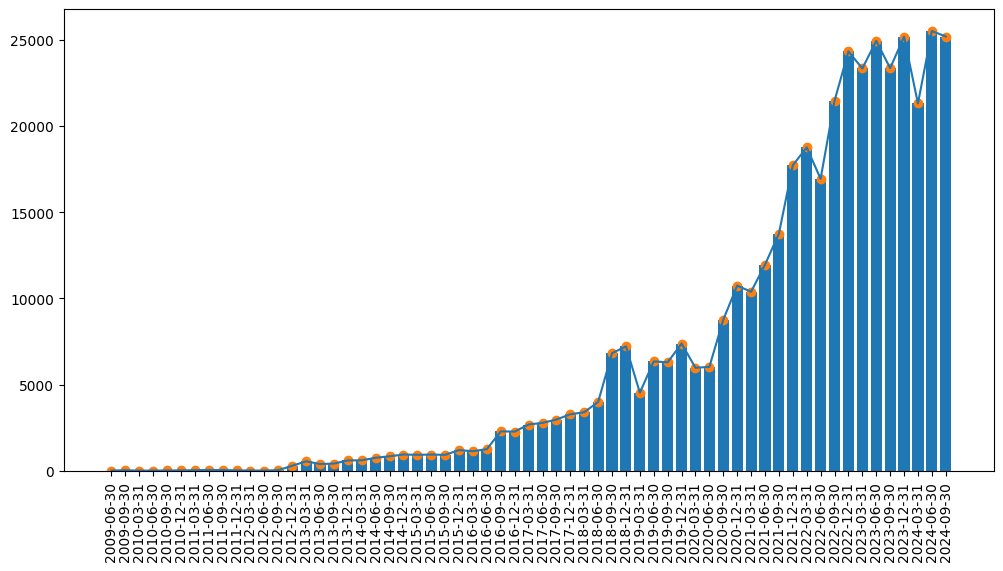

In [28]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)

plt.plot(df_tesla['Fecha'][::-1],df_tesla['Revenue'][::-1])
plt.bar(df_tesla['Fecha'][::-1],df_tesla['Revenue'][::-1])
plt.scatter(df_tesla['Fecha'][::-1],df_tesla['Revenue'][::-1])
plt.show()

In [29]:
df_tesla.head()

fecha24 = df_tesla['Fecha'].loc[0]
revenue24 = df_tesla['Revenue'].loc[0]

print(f'Tesla obtuvo ingresos de {revenue24} millones de dólares en su último trimestre registrado ({fecha24}).')

Tesla obtuvo ingresos de 25182.0 millones de dólares en su último trimestre registrado (2024-09-30).
